# Global AI Hub - Python ile Veri Analizi Eğitimi

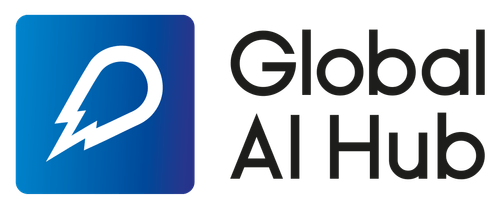

## 0. Veri Setinin Hazırlanması

**Veri Seti ve Adresi:**
NFL Big Data Bowl 2025cehttps://www.kaggle.com/competitions/nfl-big-data-bowl-2025ta

In [82]:
# Kullanacağımız kütüphaneleri yükleyelim.

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Diğer örnek görselleştirme kütüphaneleri
# ggplot
# Bokeh
# Plotly


In [83]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/nfl-big-data-bowl-2025/games.csv")
df = df_.copy()

In [84]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

## 1. Veriye İlk Bakış

In [85]:
# Veri setinin ilk 3 gözlemini görelim.
df.head()



,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2.022091e+09,2022.0,1.0,9/8/2022,20:20:00,LA,BUF,10,31.0
1,2.022091e+09,2022.0,NaN,9/11/2022,13:00:00,ATL,NO,26,27.0
2,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CAR,CLE,24,26.0
3,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CHI,SF,19,10.0
4,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CIN,PIT,20,23.0


In [86]:
df.tail()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
131,2.022111e+09,2022.0,9.0,11/6/2022,13:00:00,WAS,MIN,17,20.0
132,2.022111e+09,2022.0,9.0,11/6/2022,16:05:00,ARI,SEA,21,31.0
133,2.022111e+09,2022.0,9.0,11/6/2022,16:25:00,TB,LA,16,13.0
134,2.022111e+09,2022.0,9.0,11/6/2022,20:20:00,KC,TEN,20,17.0
135,2.022111e+09,2022.0,9.0,11/7/2022,20:15:00,NO,BAL,13,27.0


Veri setindeki satır ve sütun sayılarını `.shape` kullanarak görebiliriz.

In [87]:
df.shape # -> (satır, sütun)

(136, 9)

Veri setindeki değişkenlerin isimlerine erişmek istersek `df.columns` kullanabiliriz.

In [88]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['gameId', 'season', 'week', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr', 'homeFinalScore', 'visitorFinalScore'] 

Veri seti içerisinde toplam 9 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



`info()` metodunu kullanarak, veri setine ait yapısal bilgilere ulaşabiliriz.

Bu noktada elimizde kolonların veri tiplerinin doğru olup olmadığını, kayıt sayılarını, kolon isimlerini mutlaka kontrol etmeliyiz.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameId             133 non-null    float64
 1   season             130 non-null    float64
 2   week               132 non-null    float64
 3   gameDate           131 non-null    object 
 4   gameTimeEastern    134 non-null    object 
 5   homeTeamAbbr       130 non-null    object 
 6   visitorTeamAbbr    133 non-null    object 
 7   homeFinalScore     136 non-null    int64  
 8   visitorFinalScore  129 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 9.7+ KB


Sadece elimizdeki değişkenleri görmek ve tiplerini görüntülemek istersek, `dtypes` kullanabiliriz.

In [90]:
df.dtypes

gameId               float64
season               float64
week                 float64
gameDate              object
gameTimeEastern       object
homeTeamAbbr          object
visitorTeamAbbr       object
homeFinalScore         int64
visitorFinalScore    float64
dtype: object

In [91]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "category"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

# ALIŞTIRMA: List comprehension nasıl kullanılır öğrenin ve yukarıdaki listeleri bu yapıyı kullanarak oluşturmaya çalışın.

In [92]:
print("categorical_features : ",categorical_features)
print("kartegorik veriler sutun adedi :",categorical_features.__len__())

categorical_features :  ['gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr']
kartegorik veriler sutun adedi : 4


In [93]:
print("numerical_features: ", numerical_features)
print("sayısal veriler sutun adedi :",numerical_features.__len__())

numerical_features:  ['gameId', 'season', 'week', 'homeFinalScore', 'visitorFinalScore']
sayısal veriler sutun adedi : 5


Örneğin, veri tipi Object olan kategorik değişkenlerin veri tipini Categorical olarak değiştirmek istersek, basitçe kolon isimleri üzerinde bir döngü kurarak filtreleme yapabiliriz.

Döngü içerisinde, mevcut kolon ismi categorical_features içerisinde bulunuyorsa, o zaman o kolonun tipini Categorical olarak değiştirelim, bulunmuyorsa bir işlem yapmayalım.

In [94]:
print("columns: ",df.columns)
for col in df.columns:
    if col in categorical_features:
        print("df[col] :",col)
        df[col] = pd.Categorical(df[col])

columns:  Index(['gameId', 'season', 'week', 'gameDate', 'gameTimeEastern',
       'homeTeamAbbr', 'visitorTeamAbbr', 'homeFinalScore',
       'visitorFinalScore'],
      dtype='object')
df[col] : gameDate
df[col] : gameTimeEastern
df[col] : homeTeamAbbr
df[col] : visitorTeamAbbr


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gameId             133 non-null    float64 
 1   season             130 non-null    float64 
 2   week               132 non-null    float64 
 3   gameDate           131 non-null    category
 4   gameTimeEastern    134 non-null    category
 5   homeTeamAbbr       130 non-null    category
 6   visitorTeamAbbr    133 non-null    category
 7   homeFinalScore     136 non-null    int64   
 8   visitorFinalScore  129 non-null    float64 
dtypes: category(4), float64(4), int64(1)
memory usage: 10.2 KB


In [96]:
df['visitorTeamAbbr'][:5]

0    BUF
1     NO
2    CLE
3     SF
4    PIT
Name: visitorTeamAbbr, dtype: category
Categories (32, object): ['ARI', 'ATL', 'BAL', 'BUF', ..., 'SF', 'TB', 'TEN', 'WAS']

Veri setimizin betimsel istatistiklerine ulaşmak için `describe()` fonksiyonunu kullanıyoruz.

Bu fonksiyon eksik verileri göz ardı eder ve default olarak yalnızca numerik değişkenlere bakar.

In [97]:
df.describe().T # -> .T eklentisi elde edeceğimiz çıktıyı transpose eder.

# df.describe(include = "all") -> Veri setindeki tüm değişkenleri dahil etmek için include parametresine "all" değerini verebilirsiniz.

,count,mean,std,min,25%,50%,75%,max
gameId,133.0,2.022099e+09,5990.960135,2.022091e+09,2.022093e+09,2.022101e+09,2.022102e+09,2.022111e+09
season,130.0,2.022000e+03,0.000000,2.022000e+03,2.022000e+03,2.022000e+03,2.022000e+03,2.022000e+03
week,132.0,4.886364e+00,2.581933,1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00
homeFinalScore,136.0,2.266912e+01,8.659874,3.000000e+00,1.700000e+01,2.250000e+01,2.700000e+01,4.900000e+01
visitorFinalScore,129.0,2.115504e+01,9.795128,0.000000e+00,1.400000e+01,2.100000e+01,2.700000e+01,4.800000e+01


In [98]:
df.describe(include = "all")

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
count,1.330000e+02,130.0,132.000000,131,134,130,133,136.000000,129.000000
unique,NaN,NaN,NaN,26,8,32,32,NaN,NaN
top,NaN,NaN,NaN,10/2/2022,13:00:00,NO,BAL,NaN,NaN
freq,NaN,NaN,NaN,14,71,6,5,NaN,NaN
mean,2.022099e+09,2022.0,4.886364,NaN,NaN,NaN,NaN,22.669118,21.155039
std,5.990960e+03,0.0,2.581933,NaN,NaN,NaN,NaN,8.659874,9.795128
min,2.022091e+09,2022.0,1.000000,NaN,NaN,NaN,NaN,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,NaN,NaN,NaN,NaN,17.000000,14.000000
50%,2.022101e+09,2022.0,5.000000,NaN,NaN,NaN,NaN,22.500000,21.000000
75%,2.022102e+09,2022.0,7.000000,NaN,NaN,NaN,NaN,27.000000,27.000000


## 2. Eksik Veri Analizi

### 2.1 Eksik Verilerin Gözlemlenmesi

In [99]:
df.isna().sum() 

gameId               3
season               6
week                 4
gameDate             5
gameTimeEastern      2
homeTeamAbbr         6
visitorTeamAbbr      3
homeFinalScore       0
visitorFinalScore    7
dtype: int64

Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.

In [100]:
df.isna().sum().sum()

36

In [101]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

gameId               133
season               130
week                 132
gameDate             131
gameTimeEastern      134
homeTeamAbbr         130
visitorTeamAbbr      133
homeFinalScore       136
visitorFinalScore    129
dtype: int64

In [102]:
df.notnull().sum().sum()

1188

In [103]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 1188 adet eksik olmayan, 36 eksik gözlem var.


In [104]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
1,2.022091e+09,2022.0,NaN,9/11/2022,13:00:00,ATL,NO,26,27.0
6,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,HOU,IND,20,NaN
8,NaN,2022.0,1.0,9/11/2022,13:00:00,NYJ,BAL,9,24.0
11,2.022091e+09,2022.0,1.0,NaN,16:25:00,LAC,LV,24,19.0
20,2.022092e+09,2022.0,2.0,9/18/2022,13:00:00,JAX,IND,24,NaN
22,2.022092e+09,2022.0,2.0,9/18/2022,13:00:00,NYG,NaN,19,16.0
23,2.022092e+09,2022.0,2.0,NaN,13:00:00,PIT,NE,14,17.0
26,2.022092e+09,NaN,2.0,9/18/2022,16:25:00,DAL,CIN,20,NaN
28,NaN,2022.0,2.0,9/18/2022,16:25:00,LV,ARI,23,29.0
31,2.022092e+09,2022.0,2.0,9/19/2022,20:30:00,PHI,NaN,24,7.0


In [105]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2.022091e+09,2022.0,1.0,9/8/2022,20:20:00,LA,BUF,10,31.0
2,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CAR,CLE,24,26.0
3,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CHI,SF,19,10.0
4,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CIN,PIT,20,23.0
5,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,DET,PHI,35,38.0


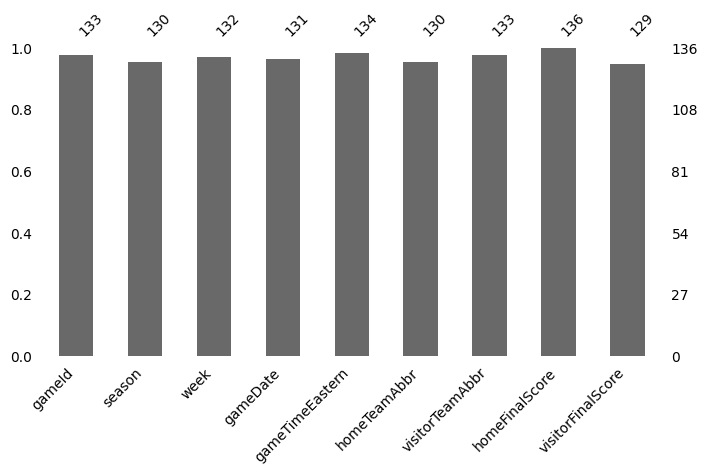

In [106]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

gameDate', 'gameTimeEastern' özellikleri bağdaşık olduğunu düşündüm o yüzden eksik verilerin denkliklerini iki özellik içinde görmek isetdim ama beklediğim gibiibir kesişim olmadı 

<Axes: >

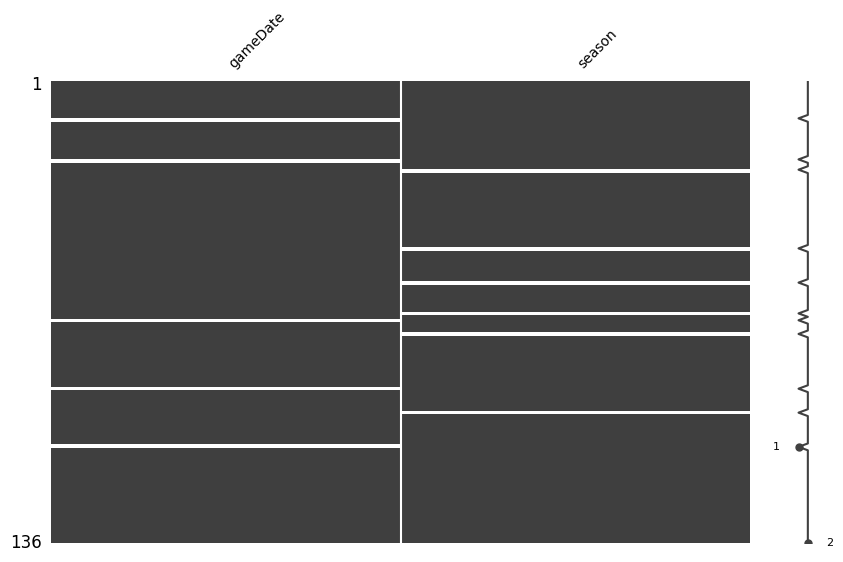

In [107]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['gameDate', 'season']],
            figsize = (10, 6),
            fontsize = 10)

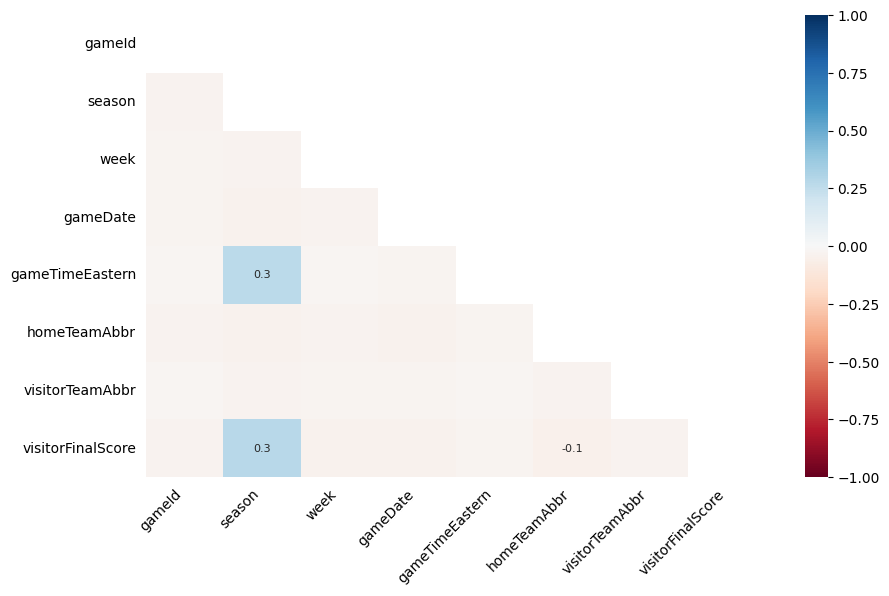

In [108]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

<Axes: >

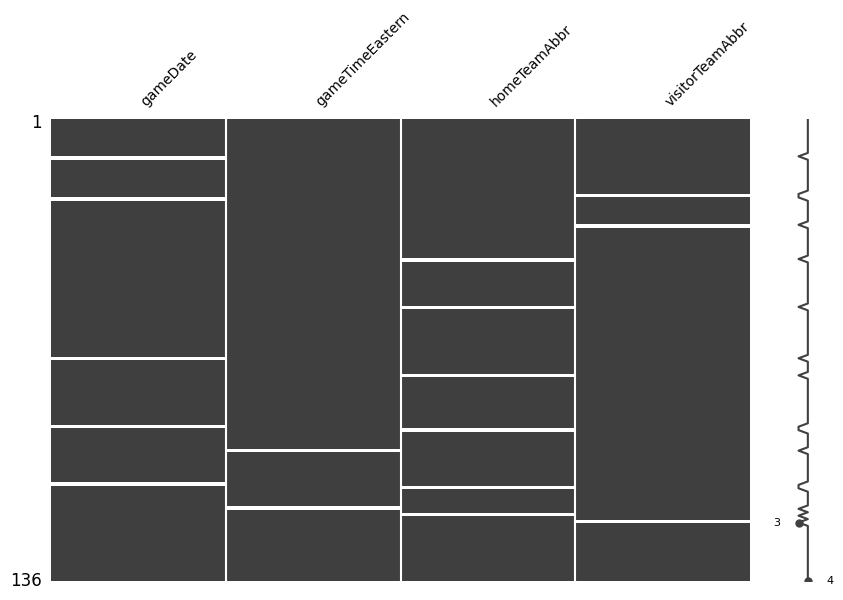

In [109]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[["gameDate", "gameTimeEastern", "homeTeamAbbr", "visitorTeamAbbr"]],
            figsize = (10, 6),
            fontsize = 10)

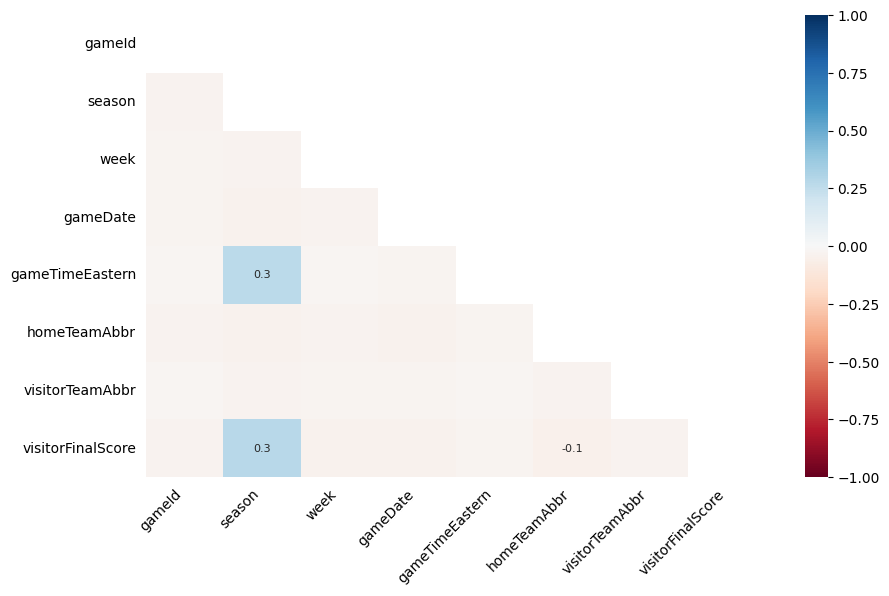

In [110]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

### 2.2 Yöntem 1: Eksik Verilerin Silinmesi


In [122]:
df.isnull().sum().sum()

36

In [128]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2.022091e+09,2022.0,1.0,9/8/2022,20:20:00,LA,BUF,10,31.0
1,2.022091e+09,2022.0,NaN,9/11/2022,13:00:00,ATL,NO,26,27.0
2,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CAR,CLE,24,26.0
3,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CHI,SF,19,10.0
4,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CIN,PIT,20,23.0
...,...,...,...,...,...,...,...,...,...
131,2.022111e+09,2022.0,9.0,11/6/2022,13:00:00,WAS,MIN,17,20.0
132,2.022111e+09,2022.0,9.0,11/6/2022,16:05:00,ARI,SEA,21,31.0
133,2.022111e+09,2022.0,9.0,11/6/2022,16:25:00,TB,LA,16,13.0
134,2.022111e+09,2022.0,9.0,11/6/2022,20:20:00,KC,TEN,20,17.0


In [129]:
df.isnull().sum().sum()

36

bu sonuca göre türm değerleri null olan bir veri yokmuş çünkü eksik veri sayısında değişilkik olmadı

In [134]:
df.isnull().sum()

gameId               3
season               6
week                 4
gameDate             5
gameTimeEastern      2
homeTeamAbbr         6
visitorTeamAbbr      3
homeFinalScore       0
visitorFinalScore    7
dtype: int64

game ıd unik tek oldugu için ve verinin hassasiyetini etkileyip modeli yanıltma ihtimali çok yüksek olması gerekçesiyle gameid si olmayan verileir silelim veri setimizden

In [136]:
# gameId sütunu NaN olan satırları silme
df = df[df['gameId'].notna()]


In [137]:
df.isnull().sum()

gameId               0
season               6
week                 4
gameDate             5
gameTimeEastern      2
homeTeamAbbr         6
visitorTeamAbbr      3
homeFinalScore       0
visitorFinalScore    7
dtype: int64

In [138]:
df.isnull().sum().sum()

33

gam eid si nun olan degerler silindi 

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gameId             133 non-null    float64 
 1   season             130 non-null    float64 
 2   week               132 non-null    float64 
 3   gameDate           131 non-null    category
 4   gameTimeEastern    134 non-null    category
 5   homeTeamAbbr       130 non-null    category
 6   visitorTeamAbbr    133 non-null    category
 7   homeFinalScore     136 non-null    int64   
 8   visitorFinalScore  129 non-null    float64 
dtypes: category(4), float64(4), int64(1)
memory usage: 10.2 KB


### 2.3 Yöntem 2: Eksik Verilerin Doldurulması
r.

kopyası alınan veri setinin ilk 5 degerinin getirilmesi

In [131]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2.022091e+09,2022.0,1.0,9/8/2022,20:20:00,LA,BUF,10,31.0
1,2.022091e+09,2022.0,NaN,9/11/2022,13:00:00,ATL,NO,26,27.0
2,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CAR,CLE,24,26.0
3,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CHI,SF,19,10.0
4,2.022091e+09,2022.0,1.0,9/11/2022,13:00:00,CIN,PIT,20,23.0


In [133]:
df_fillna.isna().sum().sum()

36

In [132]:
df_fillna.isna().sum()

gameId               3
season               6
week                 4
gameDate             5
gameTimeEastern      2
homeTeamAbbr         6
visitorTeamAbbr      3
homeFinalScore       0
visitorFinalScore    7
dtype: int64

#### 2.3.1 Sayısal Değişkenlerin Doldurulması

In [ ]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_salary = df_fillna['salary'].mean()

df_fillna['salary'].fillna(value = mean_salary, inplace = True)

df_fillna.isna().sum()

In [ ]:
# Doldurma işleminin döngüyle yapılması
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace = True)

In [ ]:
df_fillna.isna().sum()

In [ ]:
df.describe().T

Doldurma işlemini mean yerine median değer ile de gerçekleştirebiliriz, ancak bunu kuyruklu (skewed) dağılımlarda yapmayı tercih ediyoruz.

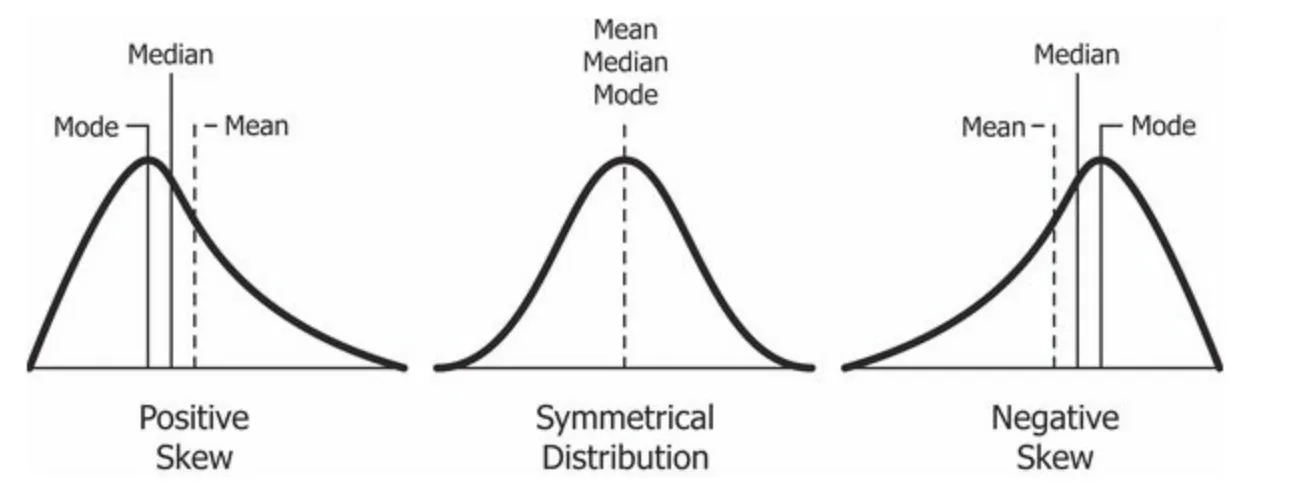

In [ ]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['salary'])
plt.show()

#### 2.3.2 Kategorik Değişkenlerin Doldurulması

In [ ]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['work_setting'].isna().sum()

# work_setting değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['work_setting'].mode()

# work_setting değişkenini mode değeri ile dolduralım.
df_fillna['work_setting'] = df_fillna['work_setting'].fillna(value = work_setting_mode[0])

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

In [ ]:
df_fillna[["job_category"]][:20]

In [ ]:
# Önceki değer ile doldurma işlemi
df_fillna["job_category"].fillna(method = "bfill")

In [ ]:
# Sonraki değer ile doldurma işlemi
df_fillna["job_category"].fillna(method = "ffill")

#### 2.3.3 Kategorik Kırılım İle Doldurma İşlemi

Burada basitçe mean ve median değerler ile doldurma işlemi yapmış olsak da, eksik veri durumunu bu kadar basit bir şekilde ele almak her zaman doğru olmayacaktır. Bu tarz basit doldurma işlemleri hızlı bir çözüm olarak ele alınmalıdır. Daha analitik bir yaklaşım için veri içerisinde benzetimler uygulayarak doldurma işlemlerini buna göre gerçekleştirebiliriz.

Örneğin elimizdeki salary kolonunu basitçe mean değer ile doldurmuştuk. Ancak biz biliyoruz ki elimizde job_title isimli bir kolon var ve bu kolonda farklı pozisyonlar yer almakta. Bu durumda örneğin Data Engineer pozisyonuna ait eksik bir maaş verisini, veri setimizdeki Data Engineer pozisyonlarına ait maaşların ortalama (veya median) değeriyle doldurmamız daha doğru bir yaklaşım olacaktır. Çünkü farklı pozisyonların farklı maaş ortalamaları olacağı için, eksik maaş verisini o kaydın ait olduğu grubun istatistiksel değerine göre doldurmak daha doğrudur.

In [ ]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

In [ ]:
# Bu kodun ne yaptığını kodu çalıştırarak keşfedin.

#job_title_mean_salary_df = df_categorical_fillna.groupby("job_title", observed = False)["salary"].mean().to_frame()

In [ ]:
df_categorical_fillna["salary"].fillna(value = df_categorical_fillna.groupby("job_title")["salary"].transform("mean"),
                                       inplace = True)

In [ ]:
df_categorical_fillna.isna().sum()

In [ ]:
df_categorical_fillna[df_categorical_fillna[["job_title", "salary"]].isna().all(axis=1)][["job_title", "salary"]]


In [ ]:
df_categorical_fillna[df_categorical_fillna['salary'].isnull()]

#### 2.3.4 Makine Öğrenmesi ile Değer Atama Teknikleri

Makine öğrenmesi yöntemleri kullanarak da eksik verileri doldurmak mümkündür. Makine Öğrenmesi modelleri bu bootcamp'in konusu olmadığı için detaylı bir anlatım gerçekleştirilmeyecektir.

**Hangi yöntemler kullanılabilir?**:
- KNNImputer (K-Nearest Neighbor)
- Random Forest Classifier

Google -> "How can I fill missing values by using Machine Learning techniques in Python?", "Python ile eksik verileri Makine Öğrenmesi teknikleri kullanarak nasıl doldurabilirim?"

## 3. Kategorik Değişken Analizi

In [ ]:
df = df_.copy()
df.info()

### 3.1 Kategorik Değişken İşlemleri

In [ ]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

In [ ]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_categorical["salary_currency"].unique()

In [ ]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

In [ ]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

In [ ]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = df["company_size"].unique().tolist()[::-1]
comp_categories

In [ ]:
# Ordinal değişken nasıl oluşturulur?
from pandas.api.types import CategoricalDtype

df["company_size"] = df["company_size"].astype(CategoricalDtype(categories = comp_categories, ordered = True))

# ALIŞTIRMA: astype('category') ile CategoricalDtype arasında fark var mıdır? Varsa nedir? Araştırın.

In [ ]:
df["company_size"].head()

### 3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri

In [ ]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df['job_category'].value_counts().plot.barh();

In [ ]:
sns.countplot(data = df,
              y = "job_category",
              hue = "job_category",
              order = df["job_category"].value_counts().index,
              palette = "Set1");

In [ ]:
sns.barplot(data = df, x = "company_size", y = df.company_size.index);

In [ ]:
sns.catplot(data = df,
            x = "experience_level",
            y = "salary_in_usd");

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "experience_level",
            y = "salary_in_usd",
            hue = "job_category");

### 3.3 Kategorik Gruplama (groupby) İşlemleri

In [ ]:
df.head()

**Soru:** Dolar kuru bazında ortalama en çok kazanç elde eden iş kategorisi hangisi?

In [ ]:
df_usd = df.groupby(by = "job_category")["salary_in_usd"].mean().to_frame().reset_index().sort_values(by = "salary_in_usd", ascending = False)

df_usd

In [ ]:
df.groupby(by = ['job_category', 'work_setting'])['salary_in_usd'].mean().to_frame().reset_index().sort_values(by = "salary_in_usd", ascending = False)[:5]

In [ ]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "job_category", y = "salary_in_usd", hue = "work_setting");

**Soru:** Herhangi bir ülke için, iş kategorisi bazında kaç adet kayıt var?

In [ ]:
df_location = df.groupby(by = "company_location")["job_category"].value_counts().to_frame().reset_index().sort_values(by = "count", ascending = False)
df_location_usa = df_location[df_location['company_location'] == "Germany"]
df_location_usa

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df_location_usa, x = "company_location", y = 'count', hue = "job_category");

# ALIŞTIRMA: Bu yaptığımız işlemi bir fonksiyon haline getirin, bu fonksiyon kendi içinde yukarıdaki gruplama işlemini yaparak argüman olarak verilen ülke
#            ismine göre aşağıdaki grafiği oluşturmalıdır.

## 4. Sürekli Değişken Analizi

### 4.1 Sürekli Değişkenlerin İncelenmesi

In [ ]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

In [ ]:
df_numerical.describe().T

In [ ]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [ ]:
give_stats(dataframe = df)

In [ ]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df, x = "salary_in_usd", kde = True, hue = "work_setting");

In [ ]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['salary_in_usd'], fill = True);

In [ ]:
# FacetGrid kullanarak kategorik kırılımda yoğunluk gözlemleyebiliriz.
sns.FacetGrid(data = df,
              hue = "work_setting",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "salary_in_usd", fill = True).add_legend();

In [ ]:
# Catplot ile numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.
plt.figure(figsize = (12, 8))
sns.catplot(data = df, x = "work_setting", y = "salary_in_usd", hue = "company_size", kind = "point");

In [ ]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = df,
            x = "work_setting",
            y = "salary_in_usd",
            hue = "company_size");

In [ ]:
# Farklı numerik görselleştirme işlemleri için iris veri setini yükleyelim.
iris = sns.load_dataset(name = "iris")
iris[:3]

In [ ]:
# pairplot numerik değişkenler arasındaki saçılım ve yoğunluk ilişkilerini gösterir.
sns.pairplot(data = iris, hue = "species");

In [ ]:
# Scatter Plot, numerik değişkenler arasındaki saçılım ilişkisini gösterir.
sns.scatterplot(data = iris,
                x = "sepal_width",
                y = "sepal_length",
                hue = "species");

In [ ]:
# Heatmap ise corr() (korelasyon) methodu ile kullanıldığında numerik değerler arasındaki ilişki kuvvetini gösterir.
plt.figure(figsize = (10, 7))
sns.heatmap(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot = True, cmap = "coolwarm");

In [ ]:
# Çizgi grafik ile numerik değişkenlerin tarihsel olarak değişimini gözlemleyebiliriz.
plt.figure(figsize = (10, 8))
sns.lineplot(data = df,
             x = "work_year",
             y = "salary_in_usd",
             hue = "work_setting");

# ALIŞTIRMA: lineplot içerisinde çizginin etrafındaki yarı saydam alanların neyi ifade ettiğini araştırın.

## 5. Aykırı Değer Analizi (Outliers)

Aykırı değerlerin analizi de tıpkı eksik verilerde olduğu gibi hassasiyetle değerlendirilmelidir. Aykırı değerlerin varlığı veri setindeki dağılımları etkileyeceği için, aykırı değere sahip bir veri setiyle tahmin modeli oluşturduğumuzda modelimizin genellenebilirliğinin düşmesine sebep olacaktır.

Aykırı değerlerin değerlendirilmesi için sektörel bilgi, standart sapma yaklaşımı, Z-skoru, IQR yöntemi gibi yöntemler kullanılabilir. Biz burada IQR yöntemi ile basitçe bir düzeltme işlemi uygulayacağız.

In [ ]:
df = df_.copy()

In [ ]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["salary_in_usd"],
            orient = "v");

In [ ]:
df_salary_in_usd = df['salary_in_usd']
df_salary_in_usd

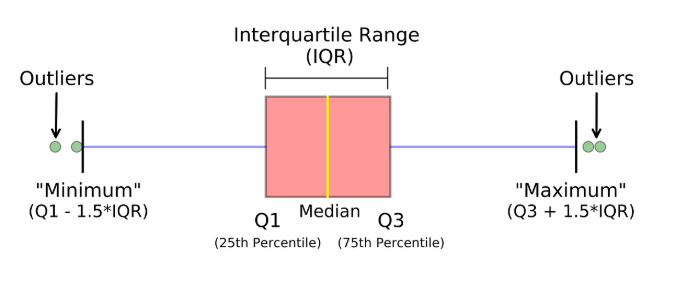

In [ ]:
# Quantile değerlerin belirlenmesi.
Q1 = df_salary_in_usd.quantile(0.25)
Q3 = df_salary_in_usd.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR


In [ ]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df_salary_in_usd[df_salary_in_usd > upper_fence].index

outlier_idx

In [ ]:
df_salary_in_usd[df_salary_in_usd > upper_fence]

### 5.1 Aykırı Gözlemlerin Silinmesi

In [ ]:
df_del = df[~(df_salary_in_usd > upper_fence)]

df_del

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["salary_in_usd"],
            orient = "v");

### 5.2 Aykırı Gözlemlerin Doldurulması

#### 5.2.1 Ortalama Değer İle Doldurma

In [ ]:
df.loc[df_salary_in_usd > upper_fence, "salary_in_usd"] = df_salary_in_usd.mean()

In [ ]:
df.loc[df_salary_in_usd > upper_fence, "salary_in_usd"]

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["salary_in_usd"],
            orient = "v");

#### 5.2.2 Baskılama Yöntemi

In [ ]:
df = df_.copy()

In [ ]:
df.loc[df_salary_in_usd > upper_fence, "salary_in_usd"] = upper_fence

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["salary_in_usd"],
            orient = "v");

Bunlar ek olarak aşağıdaki yöntemleri inceleyebilirsiniz:

- Local Outlier Factor

## 6. Feature Engineering

Bu bölümde veri setindeki özellikleri kullanarak ne tür özellikler türetebileceğimize ilişkin örnekler göreceğiz.

In [ ]:
df.head()

In [ ]:
# USD bazında maaş tutarlarına göre maaş segmentasyonu oluşturabiliriz.

def salary_range(salary):
    if salary < 80000:
        return 'Low'
    elif 80000 <= salary <= 150000:
        return 'Medium'
    else:
        return 'High'

df['salary_range'] = df['salary_in_usd'].apply(salary_range)

df.head(3)

In [ ]:
# Çalışanın kendi ülkesinde mi yoksa başka ülkede mi çalıştığının bilgisini çıkarabiliriz.
df['is_international'] = df.apply(lambda row: True if row['employee_residence'] != row['company_location'] else False, axis=1)

df[df['is_international'] == True]

# ALIŞTIRMA: company_location değişkeninde bulunan ülkeleri bulundukları kıtalarla eşleştirecek bir fonksiyon yazmayı deneyebilirsiniz.